<p style="font-family: 'Arial', sans-serif; font-size: 3rem; color: #6a1b9a; text-align: center; margin: 0; 
           text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.1); background-color: #f5f5f5; padding: 10px; 
           border-radius: 10px; border: 4px solid #6a5acd; box-shadow: 2px 2px 12px rgba(0, 0, 0, 0.1); width: 97%;">
    <span style="font-weight: bold; color: #6a1b9a; animation: pulse 2s infinite;"></span>COMPX310-2025 Lab 5 <br> Linear Regression Analysis (US Startups)
</p>

<div align="center">
  <img src="https://www.probizcap.com/wp-content/uploads/2022/06/orcutt-business-profits.jpg" width="700" height="400">
</div>

## Lab Information
- **Due Date:** October 26, 2025
- **Weight:** 3% of total course grade
- **Platform:** Google Colab, Kaggle, or VSCode (with Jupyter extension)

---

## Student Information
**Please fill in your details:**
- **Name:** Zimo Guo 
- **Student ID:** 20233006327
- **Partner's Name (if applicable):** [Partner's Name]
- **Partner's Student ID (if applicable):** [Partner's ID]

---

## Lab Overview

### Learning Objectives
In this lab, you will:
1. Understand and implement Simple Linear Regression
2. Build Multiple Linear Regression models
3. Explore Polynomial Regression with different degrees
4. Apply Ridge Regression for regularization
5. Visualize regression results and residuals
6. Compare model performance and generalization

### What is Linear Regression?
**Linear Regression** is a fundamental machine learning technique used to predict a continuous target variable based on one or more input features. It tries to find the best straight line (or hyperplane) that fits the data.

- **Simple Linear Regression**: Uses one feature to predict the target
- **Multiple Linear Regression**: Uses multiple features to predict the target
- **Polynomial Regression**: Creates polynomial features to capture non-linear relationships
- **Ridge Regression**: Adds regularization to prevent overfitting

---

<div align="center">
  <img src="https://www.erp-information.com/wp-content/uploads/2023/04/linear-regression-example.png" width="500" height="300">
</div>

### Dataset Description

This dataset contains information about **50 startup companies**. Each row represents one company with details about their spending and profits.

**Business Context:**
This analysis is designed to help **investors and venture capitalists** make informed investment decisions. By understanding the relationship between different types of spending (R&D, Administration, Marketing) and company profitability, investors can:

- **Identify high-potential startups**: Determine which spending patterns lead to higher profits
- **Evaluate investment opportunities**: Assess whether a startup's spending strategy aligns with profitable outcomes
- **Guide portfolio companies**: Advise existing portfolio companies on optimal resource allocation
- **Predict future performance**: Use spending patterns to forecast potential profitability
- **Compare across regions**: Understand if geographic location (State) impacts profitability

**Key Investment Questions This Analysis Answers:**
1. Which type of spending (R&D, Administration, or Marketing) has the strongest impact on profit?
2. Should investors prioritize startups that invest heavily in research and development?
3. Is there an optimal balance between different spending categories?
4. Do companies in certain states tend to be more profitable?
5. Can we predict a startup's profit based on their current spending behavior?

**Real-World Application:**
Imagine you're an investor with \$10 million to allocate across multiple startups. This analysis helps you identify:
- **Winners**: Startups with spending patterns that correlate with high profitability
- **Risk factors**: Companies overspending in low-impact areas
- **Growth opportunities**: Startups that could benefit from strategic spending adjustments

By building regression models, we can quantify the return on investment (ROI) for each dollar spent in different categories, enabling data-driven investment decisions rather than relying on intuition alone.

### Dataset Features

| Feature Name | Data Type | Unit | Description |
|--------------|-----------|------|-------------|
| R&D Spend | Continuous | US Dollars (\$) | Amount spent on Research & Development activities |
| Administration | Continuous | US Dollars (\$) | Amount spent on Administrative activities |
| Marketing Spend | Continuous | US Dollars (\$) | Amount spent on Marketing activities |
| State | Categorical | Text | State where company operates (California, New York, or Florida) |
| Profit | Continuous | US Dollars (\$) | **TARGET VARIABLE** - Company's profit |

### Key Information
- **Total Records**: 50 companies
- **Continuous Features**: R&D Spend, Administration, Marketing Spend
- **Categorical Feature**: State (3 categories)
- **Target Variable**: Profit (what we want to predict)

---

## Task 1: Import Libraries and Load Data

### Instructions:
1. Import pandas, numpy, matplotlib, and seaborn
2. Import necessary sklearn modules:
   - For splitting data: train_test_split
   - For models: LinearRegression, Ridge
   - For preprocessing: PolynomialFeatures, StandardScaler
   - For metrics: mean_squared_error, r2_score, mean_absolute_error
3. Set your student ID as random seed
4. Load your dataset from CSV file
5. Display first few rows to verify data is loaded correctly

---

In [353]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

RANDOM_SEED = 6327

oringinal_df = pandas.read_csv("50_Startups.csv")

print("Some rows of data:")
print(oringinal_df.head)

Some rows of data:
<bound method NDFrame.head of     R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10     NewYork  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62     NewYork  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36     NewYork  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29     NewYork  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        2498

## Task 2: Exploratory Data Analysis (EDA)

### Why do we need EDA?
- **Understand the data**: See what features we have and their distributions
- **Find patterns**: Discover relationships between features
- **Detect issues**: Find missing values, outliers, or errors
- **Guide modeling**: Help us choose appropriate features and models

---

### EDA Step 1: Basic Data Information

**Instructions:**
1. Use `.info()` to check data types and missing values
2. Use `.describe()` to get statistical summary (mean, std, min, max, etc.)
3. Check for missing values in each column.
4. If there are missing values, replace missing values in numerical features with mean and categorical feature with mode (frequent.)
5. Print the list of all column names

---

In [354]:
# # info
# print("Information of data")
# print(oringinal_df.info())

# # describe
# print("Description of data:")
# print(oringinal_df.describe())

# missing values
print("Number of missing value in data:")
print(oringinal_df.isnull().sum())

# handle missing values
# for numerical columns
oringinal_df["R&D Spend"] = oringinal_df["R&D Spend"].fillna(oringinal_df["R&D Spend"].mean())
oringinal_df["Marketing Spend"] = oringinal_df["Marketing Spend"].fillna(oringinal_df["R&D Spend"].mean())

# for non-numerical columns
oringinal_df["State"] = oringinal_df["State"].fillna(oringinal_df["State"].mode()[0])

print("Number of missing value after handling:")
print(oringinal_df.isnull().sum())

# column names
print("Column names:")
print(oringinal_df.columns.values)

Number of missing value in data:
R&D Spend          3
Administration     0
Marketing Spend    4
State              4
Profit             0
dtype: int64
Number of missing value after handling:
R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64
Column names:
['R&D Spend' 'Administration' 'Marketing Spend' 'State' 'Profit']


### EDA Step 2: Check Categorical Variable Distribution

**Instructions:**
1. Count how many companies are in each state
2. Create a count plot (bar chart) showing distribution by State
3. Add appropriate title and labels


State
NewYork       21
Florida       15
California    14
Name: count, dtype: int64


Text(0, 0.5, 'Number of Companies')

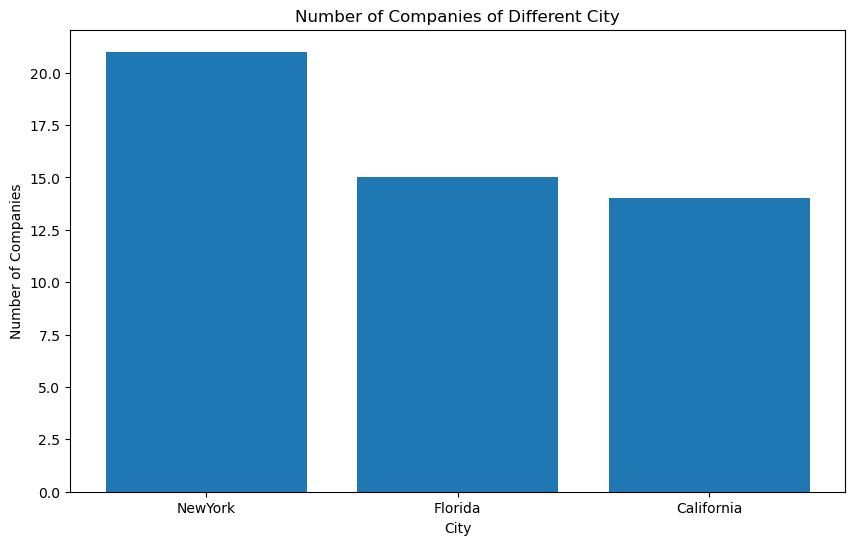

In [355]:
num_companies = oringinal_df["State"].value_counts()
print(num_companies)

plt.figure(figsize=(10, 6))
plt.bar(["NewYork", "Florida", "California"], num_companies)
plt.title("Number of Companies of Different City")
plt.xlabel("City")
plt.ylabel("Number of Companies")

### EDA Visualization 1: Distribution of Target Variable (Profit)

**Why is this important?**
Understanding the distribution of our target variable helps us know if it's normally distributed, has outliers, or is skewed.

**Instructions:**
1. Create two subplots side by side:
   - **Subplot 1**: Histogram of Profit (use 15-20 bins)
   - **Subplot 2**: Box plot of Profit
2. Add titles and labels to both plots
3. Calculate and print mean, median, min, and max of Profit

---

Text(0.5, 1.0, 'Box Plot of Profit')

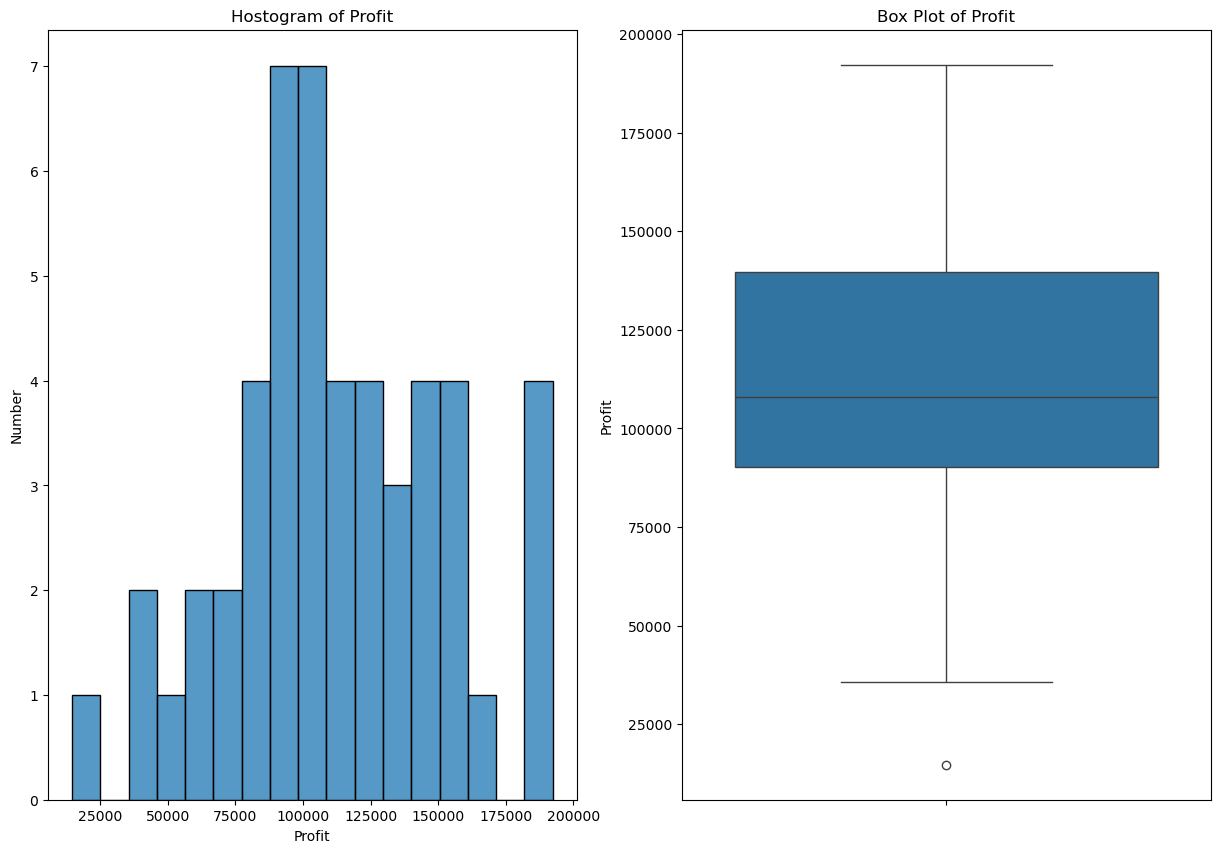

In [356]:
plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
sns.histplot(oringinal_df["Profit"], bins=17)
plt.xlabel("Profit")
plt.ylabel("Number")
plt.title("Hostogram of Profit")

plt.subplot(1, 2, 2)
sns.boxplot(oringinal_df["Profit"])
plt.title("Box Plot of Profit")

### EDA Visualization 2: Distribution of All Numerical Features

**Instructions:**
1. Create a 2x2 grid of histograms
2. Plot histogram for each feature: R&D Spend, Administration, Marketing Spend, Profit
3. Use appropriate bins (15-20) for each histogram
4. Add titles and axis labels

**What to observe:**
- Are features normally distributed?
- Do you see any skewness?
- Are there any outliers?

---

Text(0.5, 1.0, 'Hostogram of Profit')

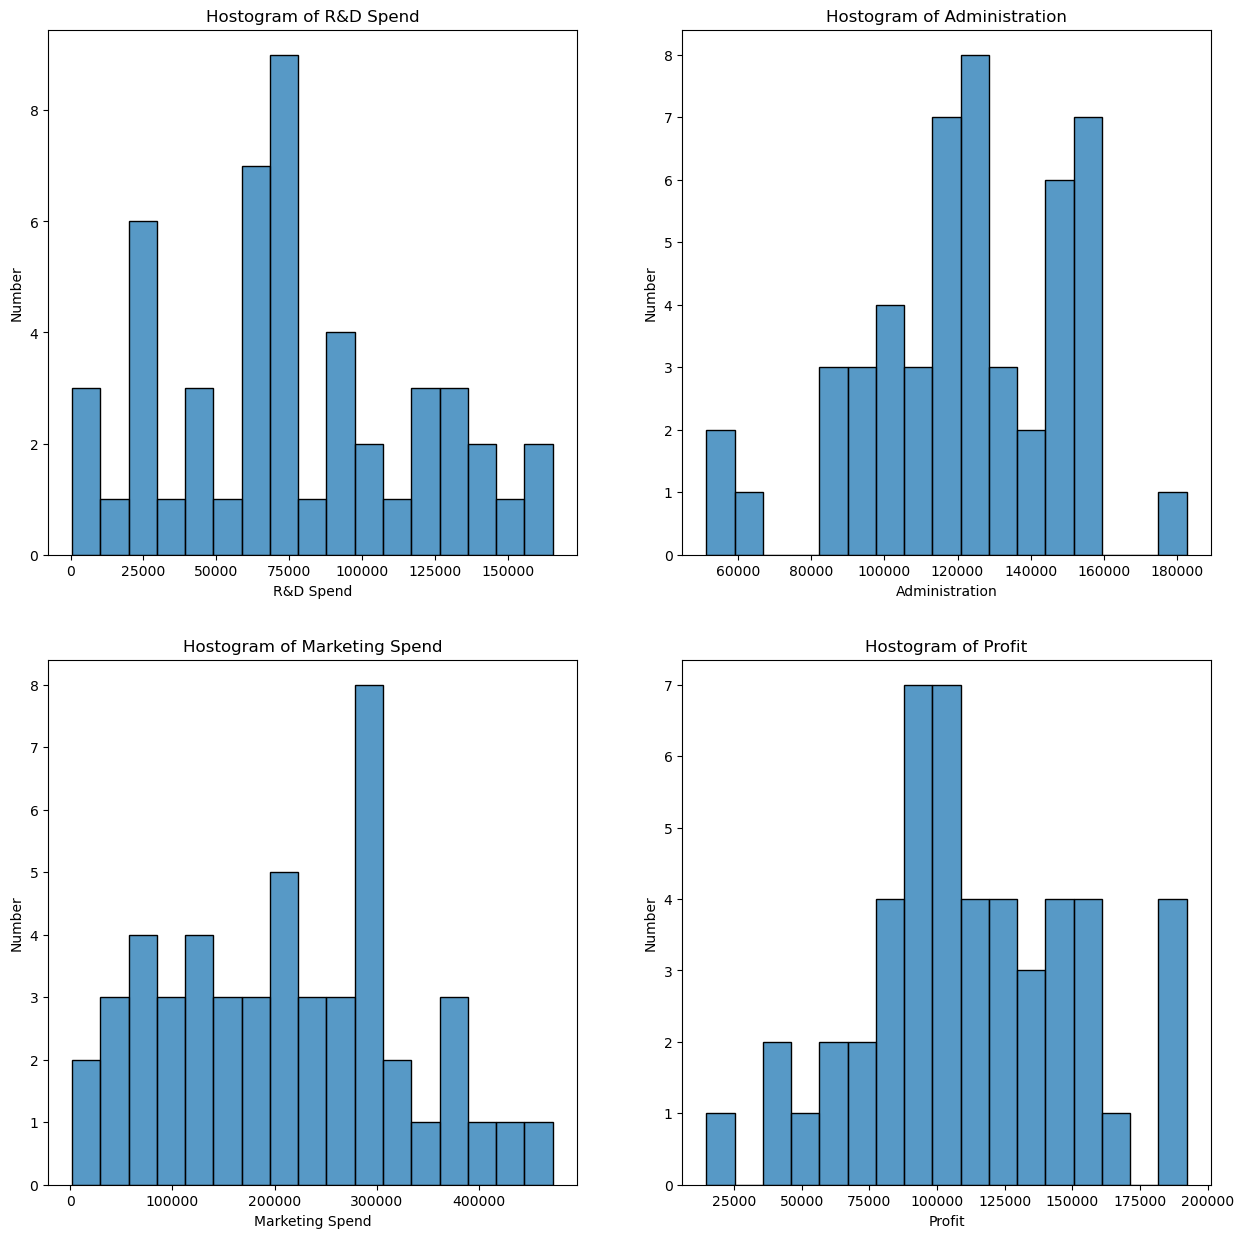

In [357]:
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
sns.histplot(oringinal_df["R&D Spend"], bins=17)
plt.xlabel("R&D Spend")
plt.ylabel("Number")
plt.title("Hostogram of R&D Spend")

plt.subplot(2, 2, 2)
sns.histplot(oringinal_df["Administration"], bins=17)
plt.xlabel("Administration")
plt.ylabel("Number")
plt.title("Hostogram of Administration")

plt.subplot(2, 2, 3)
sns.histplot(oringinal_df["Marketing Spend"], bins=17)
plt.xlabel("Marketing Spend")
plt.ylabel("Number")
plt.title("Hostogram of Marketing Spend")

plt.subplot(2, 2, 4)
sns.histplot(oringinal_df["Profit"], bins=17)
plt.xlabel("Profit")
plt.ylabel("Number")
plt.title("Hostogram of Profit")

### EDA Visualization 3: Correlation Heatmap

**What is correlation?**
Correlation shows how strongly two variables are related:
- **+1**: Perfect positive relationship (as one increases, other increases)
- **0**: No relationship
- **-1**: Perfect negative relationship (as one increases, other decreases)

**Instructions:**
1. Calculate correlation matrix for all numerical features
2. Create a heatmap using seaborn
3. Display correlation values on the heatmap (annot=True)
4. Use a diverging color scheme (like 'coolwarm')

**Analysis Questions:**
- Which feature has the strongest correlation with Profit?
  <br>R&D Spend.
- Are any features highly correlated with each other?
  <br>R&D Spend and Profit, their correlation value is almost close to 0.9.
---

Text(0.5, 1.0, 'Heatmap for Numerical Features')

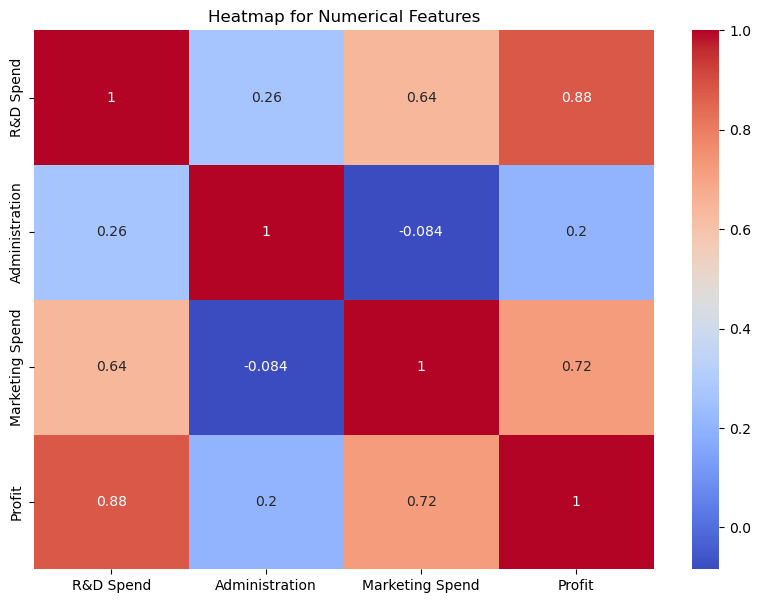

In [358]:
numerical_columns = oringinal_df.select_dtypes("number").columns
corr_matrix = oringinal_df[numerical_columns].corr()
# print(corr_matrix)

plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Heatmap for Numerical Features")

### EDA Visualization 4: Scatter Plots - Feature vs Profit

**Instructions:**
1. Create three scatter plots in one row
2. Each plot should show one feature vs Profit:
   - R&D Spend vs Profit
   - Administration vs Profit
   - Marketing Spend vs Profit
3. Add appropriate titles and labels

**What to look for:**
- Do you see linear relationships?
- Which feature shows the strongest relationship with Profit?

---

Text(0.5, 1.0, 'Scatter Plot for Marketing Spend and Profit')

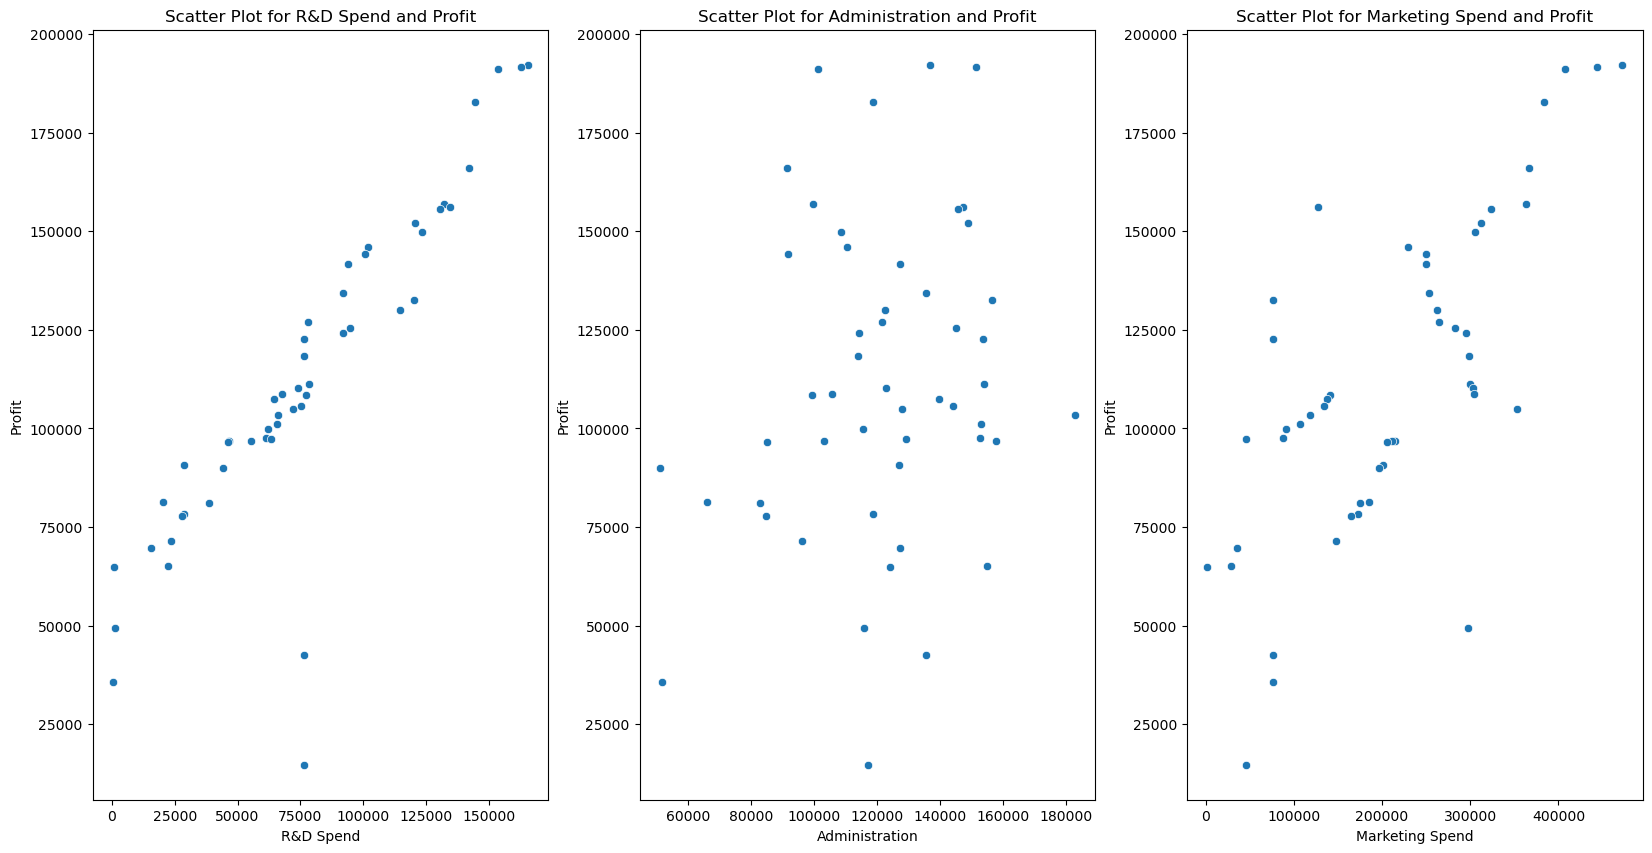

In [359]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
sns.scatterplot(oringinal_df, x="R&D Spend", y="Profit")
plt.title("Scatter Plot for R&D Spend and Profit")

plt.subplot(1, 3, 2)
sns.scatterplot(oringinal_df, x="Administration", y="Profit")
plt.title("Scatter Plot for Administration and Profit")

plt.subplot(1, 3, 3)
sns.scatterplot(oringinal_df, x="Marketing Spend", y="Profit")
plt.title("Scatter Plot for Marketing Spend and Profit")

### EDA Visualization 6: Profit by State

**Instructions:**
1. Create a box plot showing Profit distribution for each State
2. Add title and axis labels
3. Calculate and print the mean Profit for each State

**Analysis Question:**
- Is there a significant difference in profit across different states?

---

Text(0.5, 1.0, 'Box Plot of Profit fot Each State')

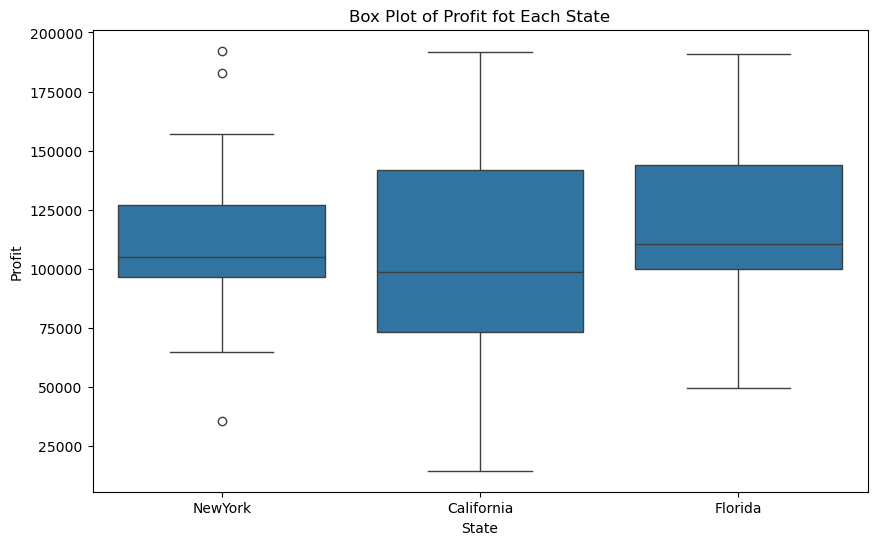

In [360]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=oringinal_df, x="State", y="Profit")

plt.title("Box Plot of Profit fot Each State")

### EDA Summary

**Write your observations:**
1. Which feature has the strongest correlation with Profit?
2. Are there any outliers in the data?
3. Do you see any linear relationships in the scatter plots?
4. Is there a significant difference in profit across states?
5. Based on EDA, which features would you choose for simple linear regression?

---

## Task 3: Data Preparation

### Step 1: Handle Categorical Variable

**Instructions:**
1. Use one-hot encoding to convert 'State' column into numerical columns
2. Remember to drop one category to avoid multicollinearity (drop_first=True)
3. Verify the new columns created and dataset shape

**What is One-Hot Encoding?**
Converts categorical variables into binary columns. For example:
- California → State_California = 1, State_NewYork = 0
- New York → State_California = 0, State_NewYork = 1

---

In [361]:
# encoder = OneHotEncoder(drop='first', sparse_output=False)
# state_new = encoder.fit_transform(oringinal_df[['State']])
# feature_names = encoder.get_feature_names_out(['State'])
# state_df = pandas.DataFrame(state_new, columns=feature_names, index=oringinal_df.index)  # 保持原索引

# df_encoded = oringinal_df.drop('State', axis=1)  # 不重置索引
# df_encoded = pandas.concat([df_encoded, state_df], axis=1)
# 方法2：使用 pandas 的 get_dummies（推荐）
df_encoded = pandas.get_dummies(oringinal_df, columns=['State'], drop_first=True)

print(df_encoded.shape)

(50, 6)


### Step 2: Separate Features and Target

**Instructions:**
1. Create X: All columns except 'Profit'
2. Create y: Only 'Profit' column
3. Print shapes and column names to verify

---

In [362]:
X = df_encoded.drop('Profit', axis=1)
y = df_encoded['Profit']

print(X.shape)
print(y.shape)

(50, 5)
(50,)


### Step 3: Train-Test Split

**Instructions:**
1. Split data into 80% training and 20% testing
2. Use your student ID as random_state
3. Print the size of training and testing sets

**Why split data?**
- **Training set**: Used to train/fit the model
- **Testing set**: Used to evaluate how well model generalizes to new data

---

In [363]:
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

print(X_training.shape)
print(X_test.shape)
print(y_training.shape)
print(y_test.shape)
print(y_test.head)

(40, 5)
(10, 5)
(40,)
(10,)
<bound method NDFrame.head of 7     155752.60
5     156991.12
22    110352.25
28    103282.38
21    111313.02
15    129917.04
49     14681.40
2     191050.39
45     64926.08
18    124266.90
Name: Profit, dtype: float64>


## Task 4: Model 1 - Simple Linear Regression

### What is Simple Linear Regression?
Uses **only ONE feature** to predict the target.
Formula: **y = mx + b**
- y = predicted profit
- m = slope
- x = input feature
- b = intercept

---

### Task: Choose TWO Features

**Instructions:**
1. Based on your correlation analysis from EDA, choose the two features most correlated with Profit
2. You will build two separate simple linear regression models
3. Document your feature choices and reasoning

---

### Build Simple Linear Regression Model 1

**Instructions:**
1. Select only your first chosen feature from training and test data
2. Create a LinearRegression model
3. Fit the model on training data
4. Make predictions on test data
5. Calculate performance metrics:
   - Mean Squared Error (MSE)
   - Root Mean Squared Error (RMSE)
   - Mean Absolute Error (MAE)
   - R² Score
6. Print all metrics with clear labels

**Understanding Metrics:**
- **MSE**: Average squared difference between actual and predicted values
- **RMSE**: Square root of MSE (in same units as target)
- **MAE**: Average absolute difference
- **R² Score**: Proportion of variance explained (0 to 1, higher is better)

---

In [364]:
X_train_linear = X_training[["R&D Spend"]]
X_test_linear = X_test[["R&D Spend"]]

linear_model_1 = LinearRegression()
linear_model_1.fit(X_train_linear, y_training)

y_predict = linear_model_1.predict(X_test_linear)

mse_1 = mean_squared_error(y_test, y_predict)
rmse_1 = np.sqrt(mse_1)
mae_1 = mean_absolute_error(y_test, y_predict)
r2_1 = r2_score(y_test, y_predict)

print(f"MSE:      {mse_1:,.2f}")
print(f"RMSE:     {rmse_1:,.2f}")
print(f"MAE:      {mae_1:,.2f}")
print(f"R² Score: {r2_1:.4f}")

MSE:      1,053,894,301.37
RMSE:     32,463.74
MAE:      15,827.86
R² Score: 0.5262


### Visualize Simple Linear Regression Model 1

**Instructions:**
1. Create a scatter plot of actual values (feature vs profit)
2. Plot the regression line on the same graph
3. Add legend showing 'Actual' and 'Predicted'
4. Add appropriate title and axis labels

**What to observe:**
- How well does the line fit the data points?
- Are there points far from the line (outliers)?

---

Text(0, 0.5, 'Profit')

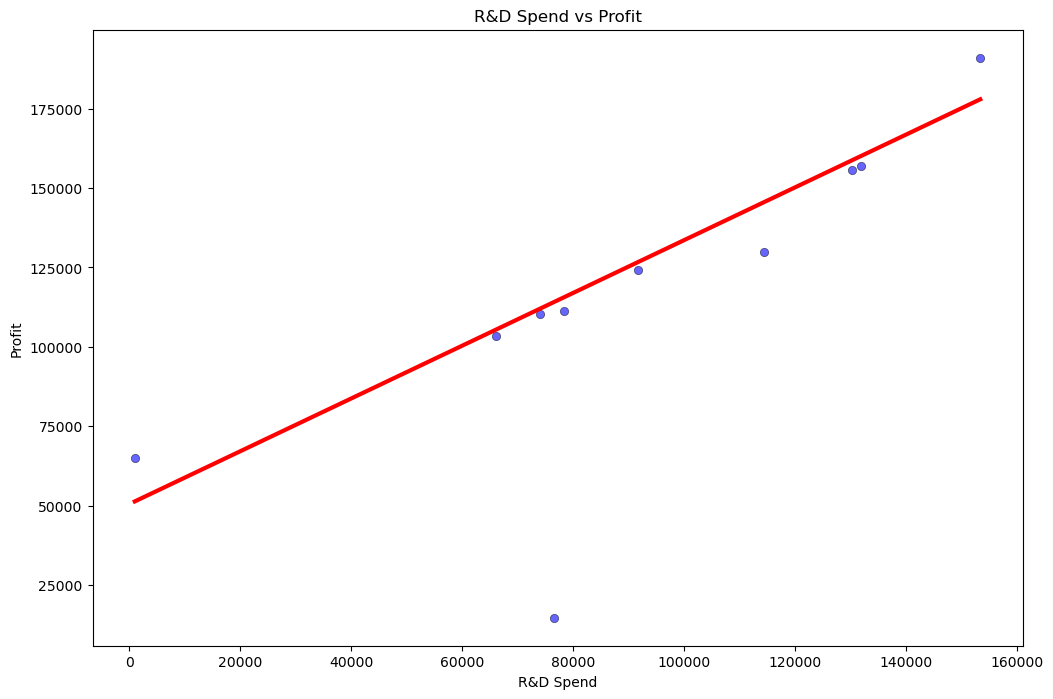

In [365]:
plt.figure(figsize=(12, 8))

plt.scatter(X_test['R&D Spend'], y_test, alpha=0.6, color='blue', label='Actual', edgecolors='black', linewidth=0.5)

x_min = X_test['R&D Spend'].min()
x_max = X_test['R&D Spend'].max()
x_line = np.linspace(x_min, x_max, 100).reshape(-1, 1)
y_line = linear_model_1.predict(pandas.DataFrame(x_line, columns=['R&D Spend']))

plt.plot(x_line, y_line, color='red', linewidth=3, label='Regression Line')

plt.title('R&D Spend vs Profit')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')

### Build Simple Linear Regression Model 2

**Instructions:**
1. Repeat the entire process for your second chosen feature
2. Train model, make predictions, calculate metrics
3. Create visualization with scatter plot and regression line

---

Text(0, 0.5, 'Profit')

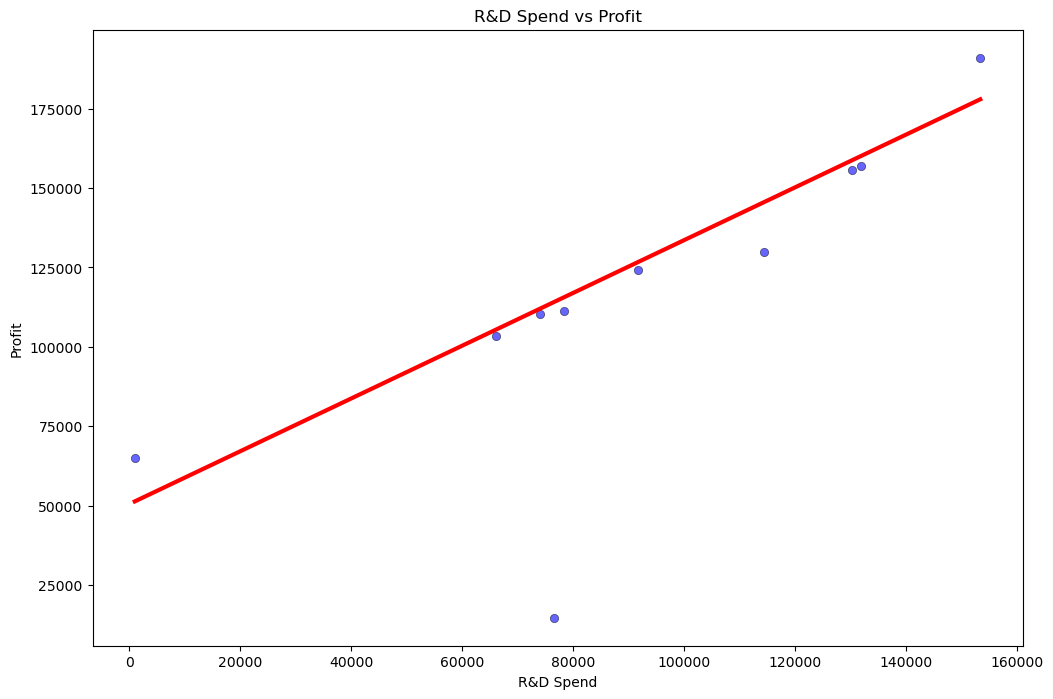

In [366]:
linear_model_2 = LinearRegression()
linear_model_2.fit(X_train_linear, y_training)

y_predict = linear_model_2.predict(X_test_linear)

mse_2 = mean_squared_error(y_test, y_predict)
rmse_2 = np.sqrt(mse_2)
mae_2 = mean_absolute_error(y_test, y_predict)
r2_2 = r2_score(y_test, y_predict)

plt.figure(figsize=(12, 8))

plt.scatter(X_test['R&D Spend'], y_test, alpha=0.6, color='blue', label='Actual', edgecolors='black', linewidth=0.5)

x_min = X_test['R&D Spend'].min()
x_max = X_test['R&D Spend'].max()
x_line = np.linspace(x_min, x_max, 100).reshape(-1, 1)
y_line = linear_model_1.predict(pandas.DataFrame(x_line, columns=['R&D Spend']))

plt.plot(x_line, y_line, color='red', linewidth=3, label='Regression Line')

plt.title('R&D Spend vs Profit')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')

### Residual Plots for Simple Linear Regression

**What are residuals?**
Residuals = Actual values - Predicted values

**Why plot residuals?**
- Check model assumptions
- Detect patterns the model missed
- Identify outliers

**Instructions for Model 1:**
1. Calculate residuals (actual - predicted)
2. Create scatter plot: Predicted values (x-axis) vs Residuals (y-axis)
3. Add a horizontal line at y=0
4. Add title and labels

**Instructions for Model 2:**
1. Repeat the same process for your second feature model

**What to look for in residual plots:**
- **Good**: Points randomly scattered around zero (no pattern)
- **Bad**: Clear pattern (funnel shape, curve) indicates model issues

---

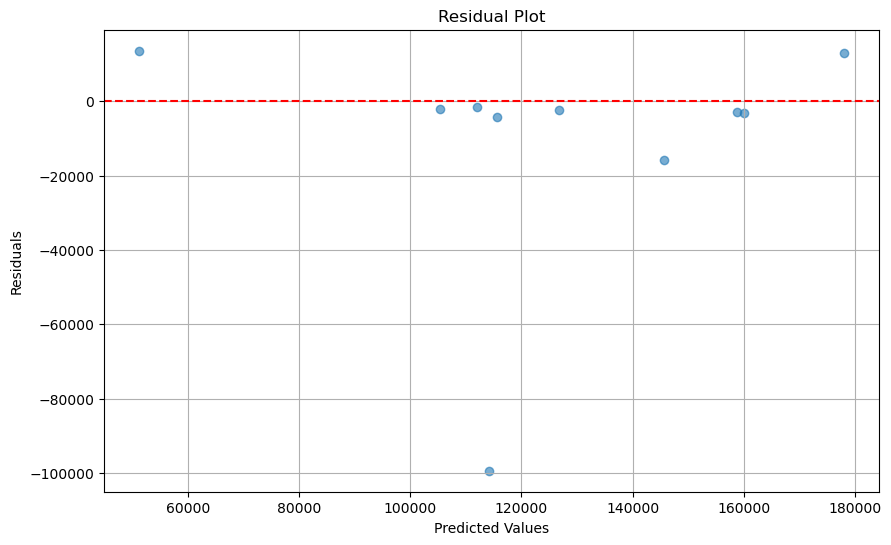

In [367]:
residuals = y_test - y_predict

plt.figure(figsize=(10, 6))
plt.scatter(y_predict, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')

plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.grid(True)
plt.show()

## Task 5: Model 2 - Multiple Linear Regression

### What is Multiple Linear Regression?
Uses **ALL features** to predict the target.
Formula: **y = b₀ + b₁x₁ + b₂x₂ + b₃x₃ + ...**

**Instructions:**
1. Create a LinearRegression model
2. Train using ALL features in X_train
3. Make predictions on X_test
4. Calculate all performance metrics (MSE, RMSE, MAE, R²)
5. Print results with clear formatting

---

In [368]:
model_multi = LinearRegression()

model_multi.fit(X_training, y_training)

y_pred = model_multi.predict(X_test)

mse_multi = mean_squared_error(y_test, y_pred)
rmse_multi = np.sqrt(mse_multi)
mae_multi = mean_absolute_error(y_test, y_pred)
r2_multi = r2_score(y_test, y_pred)

print(f"MSE:      {mse_multi:,.2f}")
print(f"RMSE:     {rmse_multi:,.2f}")
print(f"MAE:      {mae_multi:,.2f}")
print(f"R² Score: {r2_multi:.4f}")

MSE:      846,260,996.23
RMSE:     29,090.57
MAE:      17,278.04
R² Score: 0.6196


### Feature Importance Analysis

**Instructions:**
1. Extract coefficients from the trained model
2. Create a DataFrame showing Feature names and their Coefficients
3. Sort by absolute value of coefficients (largest to smallest)
4. Create a horizontal bar chart showing coefficient values
5. Add title and labels

**Analysis Question:**
- Which features have the largest impact on Profit?
- Are there any surprising results?

---

        Feature  Coefficient
  State_NewYork  5145.443051
  State_Florida  3503.890984
      R&D Spend     0.739673
Marketing Spend     0.062363
 Administration    -0.000768


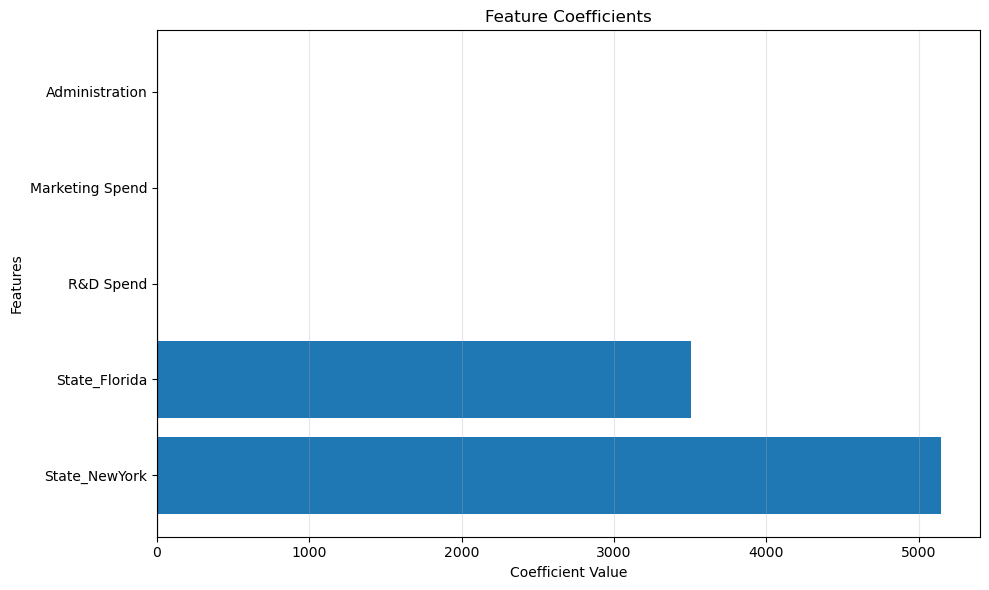

In [369]:
coefficients = model_multi.coef_

coef_df = pandas.DataFrame({
    'Feature': X_training.columns,
    'Coefficient': coefficients
})

coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)

print(coef_df[['Feature', 'Coefficient']].to_string(index=False))

plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.axvline(x=0, color='black', linewidth=0.8)

plt.title('Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

### Residual Plot for Multiple Linear Regression

**Instructions:**
1. Calculate residuals (actual - predicted)
2. Create scatter plot: Predicted profit vs Residuals
3. Add horizontal line at y=0
4. Add title and labels

**Compare with Simple Linear Regression:**
- Are residuals more randomly distributed?
- Is there less pattern?

---

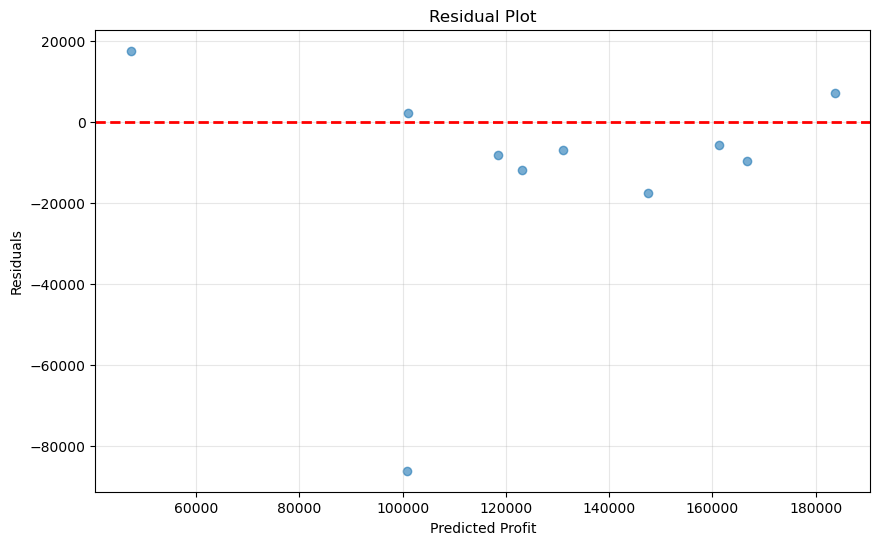

In [370]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)

plt.axhline(y=0, color='red', linestyle='--', linewidth=2)

plt.title('Residual Plot')
plt.xlabel('Predicted Profit')
plt.ylabel('Residuals')

plt.grid(True, alpha=0.3)
plt.show()

### Actual vs Predicted Plot

**Instructions:**
1. Create scatter plot: Actual profit (x-axis) vs Predicted profit (y-axis)
2. Add a diagonal line representing perfect predictions
3. Add legend and labels

**What to observe:**
- Points close to diagonal line = good predictions
- Points far from diagonal = poor predictions

---

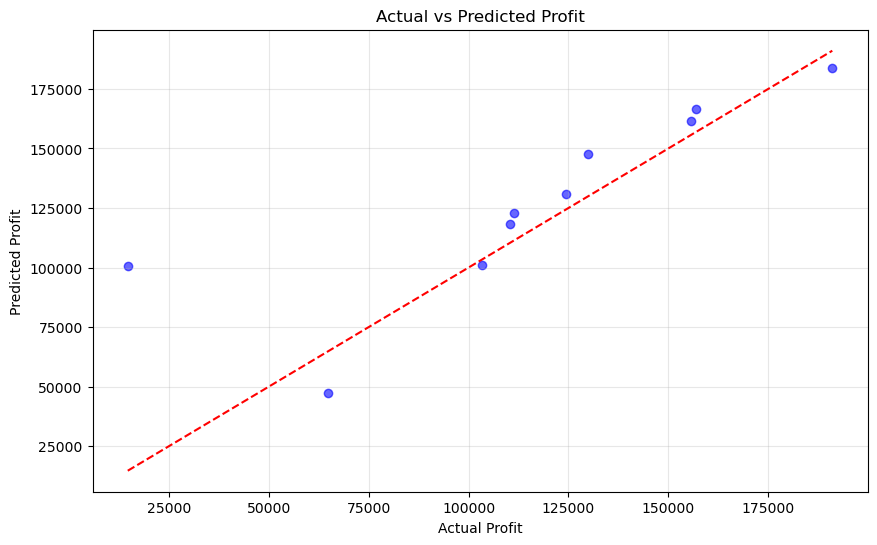

In [371]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')

plt.title('Actual vs Predicted Profit')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')

plt.grid(True, alpha=0.3)
plt.show()

## Task 6: Model 3 - Polynomial Regression

### What is Polynomial Regression?
Creates polynomial features to capture **non-linear relationships**.

**Examples:**
- Degree 2: y = b₀ + b₁x + b₂x²
- Degree 3: y = b₀ + b₁x + b₂x² + b₃x³
- Degree 4: y = b₀ + b₁x + b₂x² + b₃x³ + b₄x⁴

---

### Task: Test Degrees 2, 3, and 4

**Instructions:**
1. Use the same two features from Simple Linear Regression
2. For EACH degree (2, 3, 4):
   - Create PolynomialFeatures transformer with specified degree
   - Transform training data to create polynomial features
   - Transform test data (use transform, not fit_transform)
   - Create LinearRegression model
   - Fit model on transformed training data
   - Make predictions on transformed test data
   - Calculate all metrics (MSE, RMSE, MAE, R²)
   - Store results for comparison
3. Print results for each degree

**Important:**
- Use fit_transform on training data
- Use only transform on test data (to avoid data leakage)

---

In [372]:
X_train_single = X_training[['R&D Spend']]
X_test_single = X_test[['R&D Spend']]

results = []

for degree in [2, 3, 4]:
    print(f"DEGREE {degree}")
    
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_single)
    X_test_poly = poly.transform(X_test_single)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_training)
    y_pred = model.predict(X_test_poly)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Degree': degree,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
        'Model': model,
        'Poly': poly
    })
    
    print(f"Mean Squared Error (MSE):    {mse:,.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")
    print(f"Mean Absolute Error (MAE):    {mae:,.2f}")
    print(f"R² Score:                     {r2:.4f}")

results_df = pandas.DataFrame(results)
comparison_df = results_df[['Degree', 'MSE', 'RMSE', 'MAE', 'R2']].round(4)

DEGREE 2
Mean Squared Error (MSE):    1,012,807,602.60
Root Mean Squared Error (RMSE): 31,824.64
Mean Absolute Error (MAE):    14,709.49
R² Score:                     0.5447
DEGREE 3
Mean Squared Error (MSE):    1,013,040,031.58
Root Mean Squared Error (RMSE): 31,828.29
Mean Absolute Error (MAE):    14,292.54
R² Score:                     0.5446
DEGREE 4
Mean Squared Error (MSE):    1,006,305,068.36
Root Mean Squared Error (RMSE): 31,722.31
Mean Absolute Error (MAE):    13,578.38
R² Score:                     0.5476


### Compare Polynomial Degrees

**Instructions:**
1. Create a comparison table showing Degree, RMSE, and R² Score
2. Create two line plots side by side:
   - **Plot 1**: Degree (x-axis) vs RMSE (y-axis)
   - **Plot 2**: Degree (x-axis) vs R² Score (y-axis)
3. Use markers on the lines for clarity

**Analysis Questions:**
- Which degree gives the best R² score?
- Which degree gives the lowest RMSE?
- Do you see signs of overfitting (R² increases but might not generalize well)?

---

 Degree       RMSE  R² Score
      2 31824.6383    0.5447
      3 31828.2898    0.5446
      4 31722.3118    0.5476


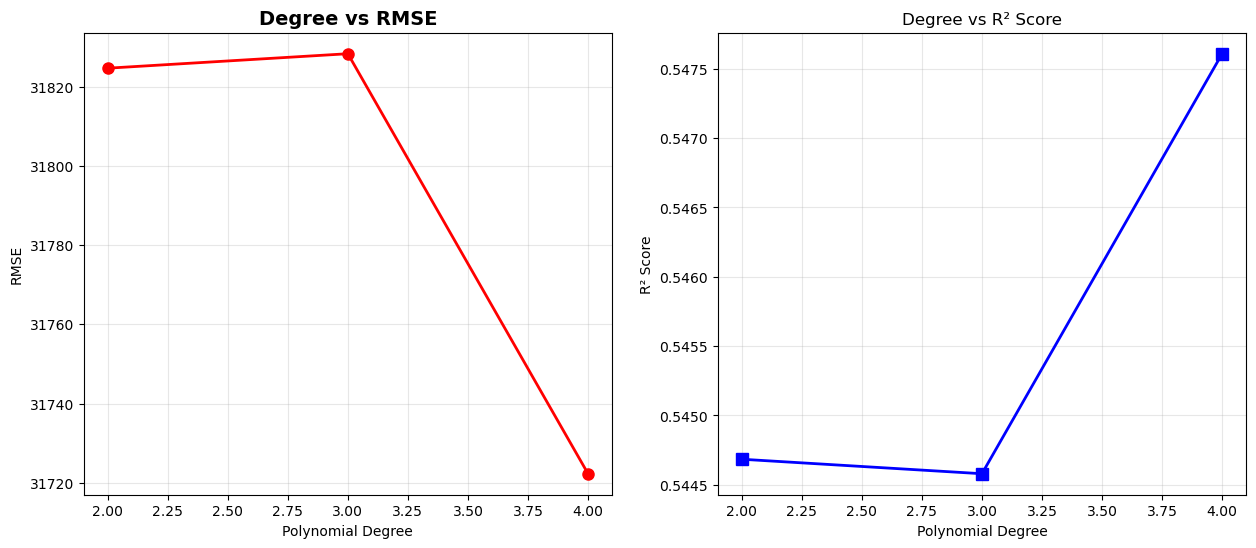

In [373]:
comparison_table = pandas.DataFrame({
    'Degree': [result['Degree'] for result in results],
    'RMSE': [result['RMSE'] for result in results],
    'R² Score': [result['R2'] for result in results]
})

print(comparison_table.to_string(index=False, float_format='%.4f'))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.plot(comparison_table['Degree'], comparison_table['RMSE'], 
         marker='o', linewidth=2, markersize=8, color='red')
ax1.set_title('Degree vs RMSE', fontsize=14, fontweight='bold')
ax1.set_xlabel('Polynomial Degree')
ax1.set_ylabel('RMSE')
ax1.grid(True, alpha=0.3)

ax2.plot(comparison_table['Degree'], comparison_table['R² Score'], 
         marker='s', linewidth=2, markersize=8, color='blue')
ax2.set_title('Degree vs R² Score')
ax2.set_xlabel('Polynomial Degree')
ax2.set_ylabel('R² Score')
ax2.grid(True, alpha=0.3)

plt.show()

### Visualize Polynomial Fits

**Instructions:**
1. Create three subplots using first feature only for simplicity (one for each degree: 2, 3, 4)
2. For each subplot:
   - Plot actual data points as scatter plot
   - Plot the polynomial regression curve
   - Add title showing the degree
   - Add legend
3. Make plots visually comparable (same axes ranges)

**What to observe:**
- How does the curve change with different degrees?
- Does higher degree always mean better fit?
- Which degree looks most appropriate (not too simple, not too complex)?

---

f:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
f:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
f:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


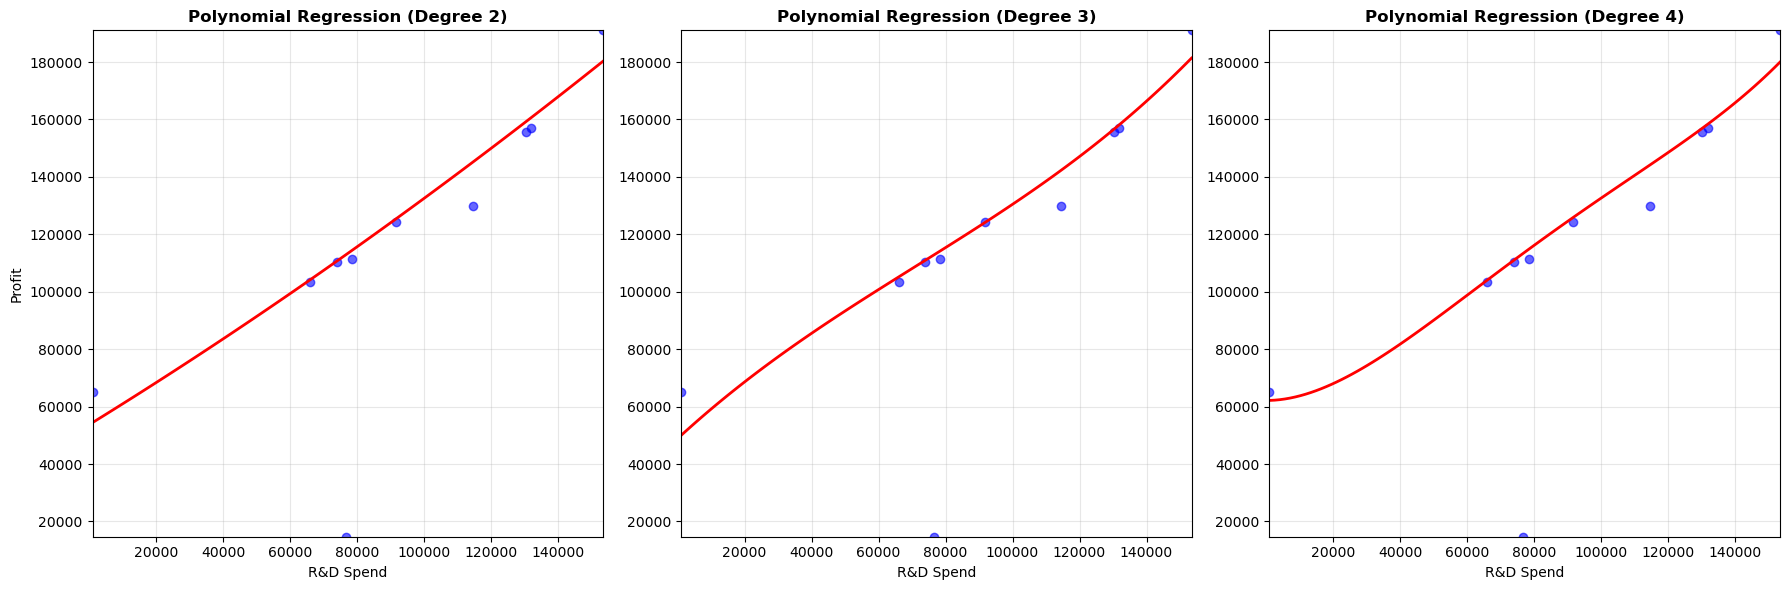

In [374]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

x_min = X_test_single.min().iloc[0]
x_max = X_test_single.max().iloc[0]
y_min = min(y_test.min(), y_pred.min())
y_max = max(y_test.max(), y_pred.max())

for i, degree in enumerate([2, 3, 4]):
    model = results[i]['Model']
    poly = results[i]['Poly']
    
    x_curve = np.linspace(x_min, x_max, 100).reshape(-1, 1)
    x_curve_poly = poly.transform(x_curve)
    y_curve = model.predict(x_curve_poly)
    
    axes[i].scatter(X_test_single, y_test, alpha=0.6, color='blue', label='Actual Data')
    axes[i].plot(x_curve, y_curve, color='red', linewidth=2, label=f'Degree {degree} Fit')
    axes[i].set_title(f'Polynomial Regression (Degree {degree})', fontsize=12, fontweight='bold')
    
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    
    axes[i].set_xlabel('R&D Spend')
    if i == 0:  
        axes[i].set_ylabel('Profit')
    
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Residual Plots for Polynomial Regression

**Instructions:**
1. Create three residual plots (one for each degree)
2. Each plot should show Predicted vs Residuals
3. Add horizontal line at y=0
4. Compare residual patterns across degrees

**Analysis:**
- Does increasing degree reduce residual patterns?
- Are there signs of overfitting in higher degrees?

---

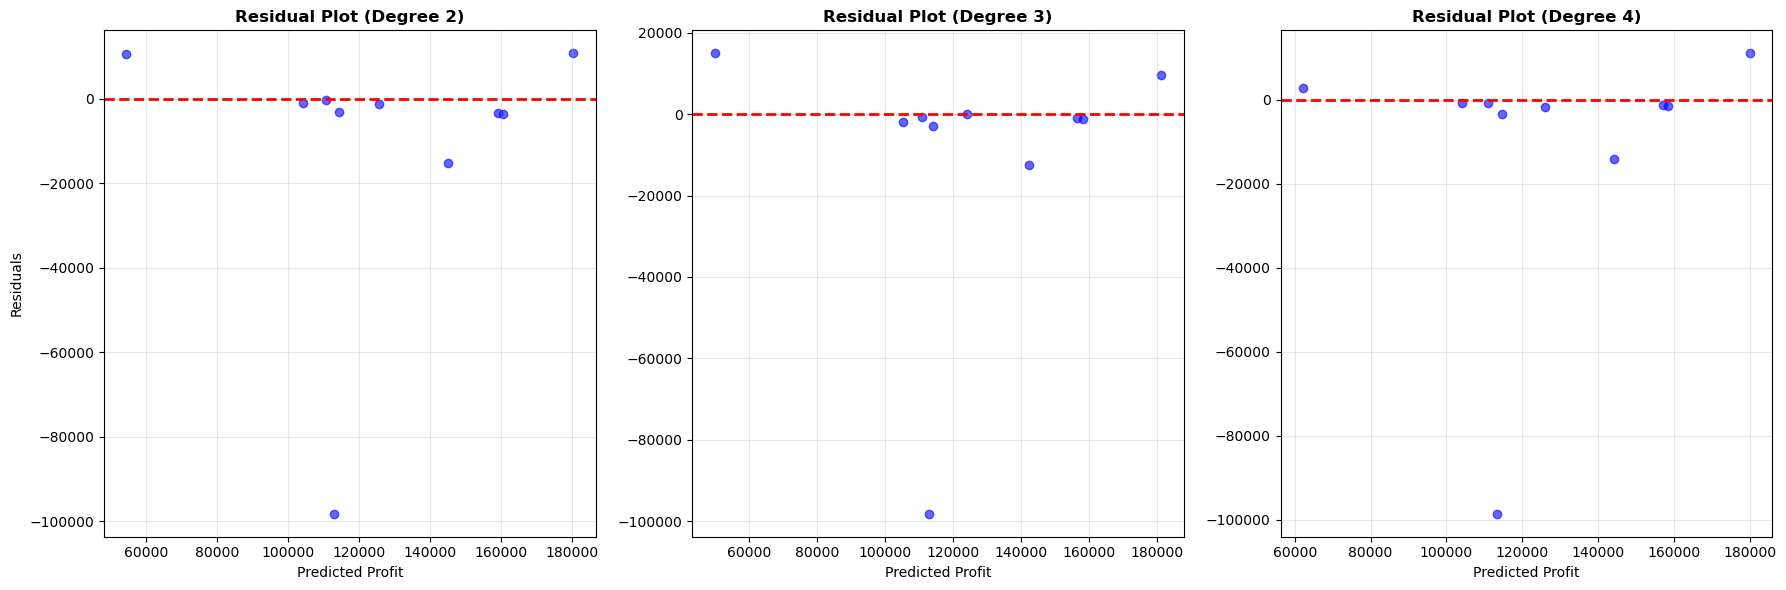

In [375]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, degree in enumerate([2, 3, 4]):
    model = results[i]['Model']
    poly = results[i]['Poly']
    X_test_poly = poly.transform(X_test_single)
    y_pred = model.predict(X_test_poly)
    
    residuals = y_test - y_pred
    
    axes[i].scatter(y_pred, residuals, alpha=0.6, color='blue')
    
    axes[i].axhline(y=0, color='red', linestyle='--', linewidth=2)
    
    axes[i].set_title(f'Residual Plot (Degree {degree})', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Predicted Profit')
    if i == 0:  
        axes[i].set_ylabel('Residuals')
    
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Determine Best Polynomial Degree

**Instructions:**
Write a summary explaining:
1. Which degree performs best on test data?
2. Which degree generalizes best (not overfitting)?
3. Your recommendation and reasoning

**Consider:**
- **Underfitting**: Model too simple, poor performance
- **Good fit**: Balanced complexity, good performance
- **Overfitting**: Too complex, fits training data perfectly but poor on test data

---

## Task 7: Model 4 - Ridge Regression

### What is Ridge Regression?
Ridge Regression is Linear Regression with **L2 regularization**.
It adds a penalty to prevent coefficients from becoming too large.

**Formula:** Minimize: (Error + α × sum of squared coefficients)
- **α (alpha)**: Regularization strength
  - α = 0: Same as regular Linear Regression
  - Small α: Light regularization
  - Large α: Strong regularization

**Why use Ridge?**
- Prevents overfitting
- Handles multicollinearity (correlated features)
- Makes model more stable

---

### Build Ridge Regression Model

**Instructions:**
1. Create a Ridge regression model with alpha=1.0 (you can experiment with different values)
2. Train on all features (like Multiple Linear Regression)
3. Make predictions on test data
4. Calculate all metrics (MSE, RMSE, MAE, R²)
5. Print results

---

In [376]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_training, y_training)
y_pred_ridge = ridge_model.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Mean Squared Error (MSE):    {mse_ridge:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ridge:,.2f}")
print(f"Mean Absolute Error (MAE):    {mae_ridge:,.2f}")
print(f"R² Score:                     {r2_ridge:.4f}")

Mean Squared Error (MSE):    852,745,555.57
Root Mean Squared Error (RMSE): 29,201.81
Mean Absolute Error (MAE):    17,247.69
R² Score:                     0.6166


### Compare Different Alpha Values

**Instructions:**
1. Test Ridge regression with different alpha values: [0.01, 0.1, 1, 10, 100]
2. For each alpha:
   - Train Ridge model
   - Calculate R² score on test data
   - Store results
3. Create a line plot showing Alpha (x-axis) vs R² Score (y-axis)
4. Use logarithmic scale for x-axis

**Analysis:**
- How does alpha affect performance?
- What is the optimal alpha value?

---

Alpha: 0.01, R² Score: 0.6195
Alpha: 0.1, R² Score: 0.6192
Alpha: 1, R² Score: 0.6166
Alpha: 10, R² Score: 0.6081
Alpha: 100, R² Score: 0.6029


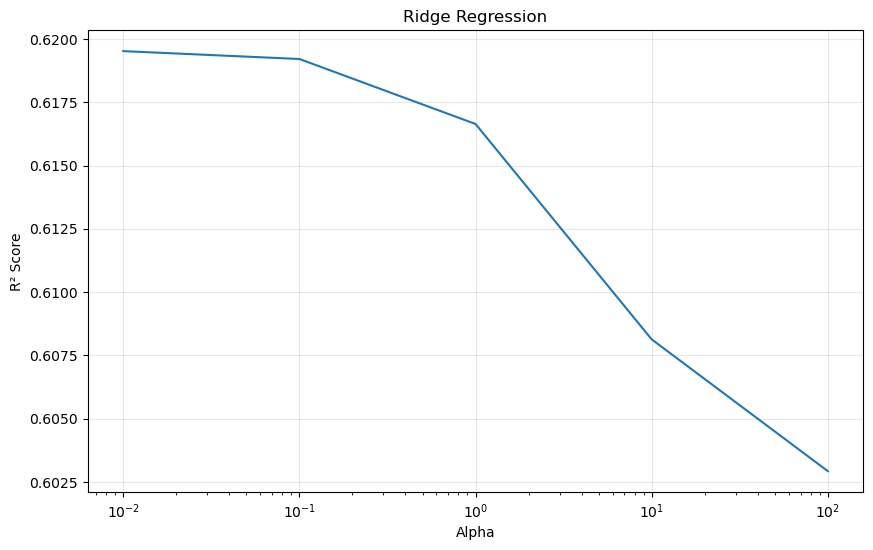

In [377]:
alphas = [0.01, 0.1, 1, 10, 100]
r2_scores = []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_training, y_training)
    y_pred = ridge_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)
    print(f"Alpha: {alpha}, R² Score: {r2:.4f}")

plt.figure(figsize=(10, 6))
plt.semilogx(alphas, r2_scores)
plt.title('Ridge Regression')
plt.xlabel('Alpha')
plt.ylabel('R² Score')
plt.grid(True, alpha=0.3)
plt.show()

### Feature Coefficients Comparison

**Instructions:**
1. Create a comparison of coefficients between:
   - Multiple Linear Regression (no regularization)
   - Ridge Regression (with best alpha)
2. Create a grouped bar chart showing coefficients for each feature
3. Add legend distinguishing the two models

**What to observe:**
- How does Ridge shrink the coefficients?
- Which features are affected most?

---

In [378]:
# mlr_coefficients = model.coef_
# best_ridge_alpha = alphas[np.argmax(r2_scores)]
# ridge_model_best = Ridge(alpha=best_ridge_alpha)
# ridge_model_best.fit(X_training, y_training)
# ridge_coefficients = ridge_model_best.coef_

# features = X_training.columns

# features = X_training.columns
# x_pos = np.arange(len(features))

# plt.figure(figsize=(12, 8))
# bar_width = 0.35

# plt.bar(x_pos - bar_width/2, mlr_coefficients, bar_width, label='Multiple Linear Regression', alpha=0.8)
# plt.bar(x_pos + bar_width/2, ridge_coefficients, bar_width, label=f'Ridge (alpha={best_ridge_alpha})', alpha=0.8)

# plt.axhline(y=0, color='black', linewidth=0.8)
# plt.xlabel('Features')
# plt.ylabel('Coefficient Values')
# plt.title('Comparison of Coefficients')
# plt.xticks(x_pos, features, rotation=45)
# plt.legend()
# plt.grid(axis='y', alpha=0.3)
# plt.show()

### Residual Plot for Ridge Regression

**Instructions:**
1. Calculate residuals for Ridge model
2. Create scatter plot of Predicted vs Residuals
3. Add horizontal line at y=0
4. Add title and labels

---

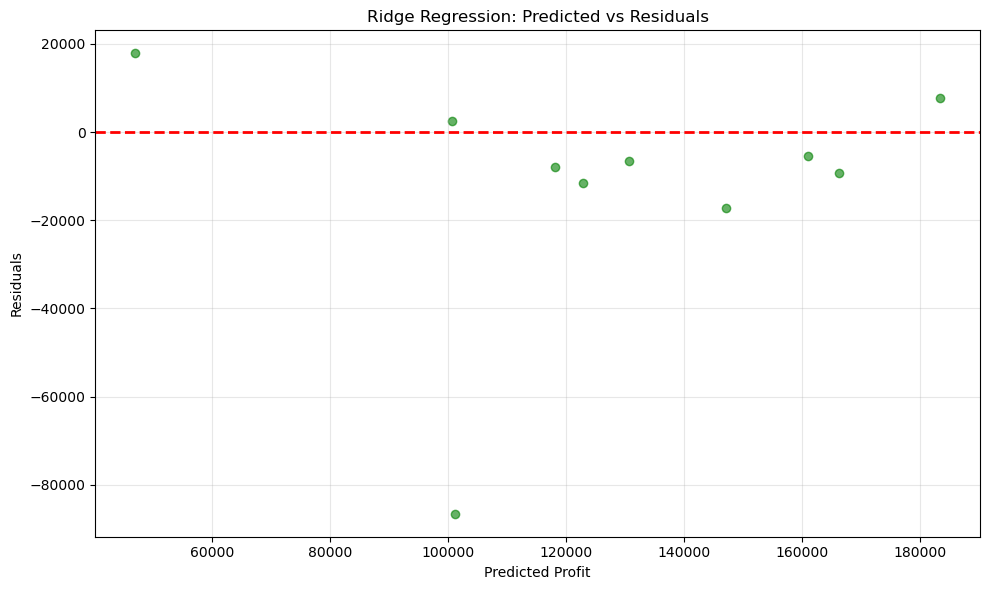

In [379]:
residuals_ridge = y_test - y_pred_ridge

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_ridge, residuals_ridge, alpha=0.6, color='green')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Ridge Regression: Predicted vs Residuals')
plt.xlabel('Predicted Profit')
plt.ylabel('Residuals')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Task 8: Final Model Comparison

### Compare All Models

**Instructions:**
1. Create a comprehensive comparison table with columns:
   - Model Name
   - RMSE
   - MAE
   - R² Score
2. Include all models:
   - Simple Linear Regression (both features)
   - Multiple Linear Regression
   - Polynomial Regression (degrees 2, 3, 4)
   - Ridge Regression
3. Sort by R² Score (highest to lowest)

---

In [380]:
comparison_data = []

comparison_data.append({
    'Model Name': 'Simple Linear Regression',
    'RMSE': rmse_1,
    'MAE': mae_1,
    'R² Score': r2_1
})

comparison_data.append({
    'Model Name': 'Multiple Linear Regression',
    'RMSE': rmse_multi,
    'MAE': mae_multi,
    'R² Score': r2_multi
})

for i, degree in enumerate([2, 3, 4]):
    comparison_data.append({
        'Model Name': f'Polynomial Regression (Degree {degree})',
        'RMSE': results[i]['RMSE'],
        'MAE': results[i]['MAE'],
        'R² Score': results[i]['R2']
    })

comparison_data.append({
    'Model Name': 'Ridge Regression',
    'RMSE': rmse_ridge,
    'MAE': mae_ridge,
    'R² Score': r2_ridge
})

comparison_df = pandas.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('R² Score', ascending=False)

print(comparison_df.to_string(index=False, float_format='%.4f'))

                      Model Name       RMSE        MAE  R² Score
      Multiple Linear Regression 29090.5654 17278.0441    0.6196
                Ridge Regression 29201.8074 17247.6934    0.6166
Polynomial Regression (Degree 4) 31722.3118 13578.3843    0.5476
Polynomial Regression (Degree 2) 31824.6383 14709.4921    0.5447
Polynomial Regression (Degree 3) 31828.2898 14292.5423    0.5446
        Simple Linear Regression 32463.7383 15827.8625    0.5262


### Visualize Model Comparison

**Instructions:**
1. Create a bar chart comparing R² scores of all models
2. Bar chart of RMSE for all models
3. Use different colors for different model types
4. Add title and labels
5. Add a horizontal line at R²=0.5 for reference

---

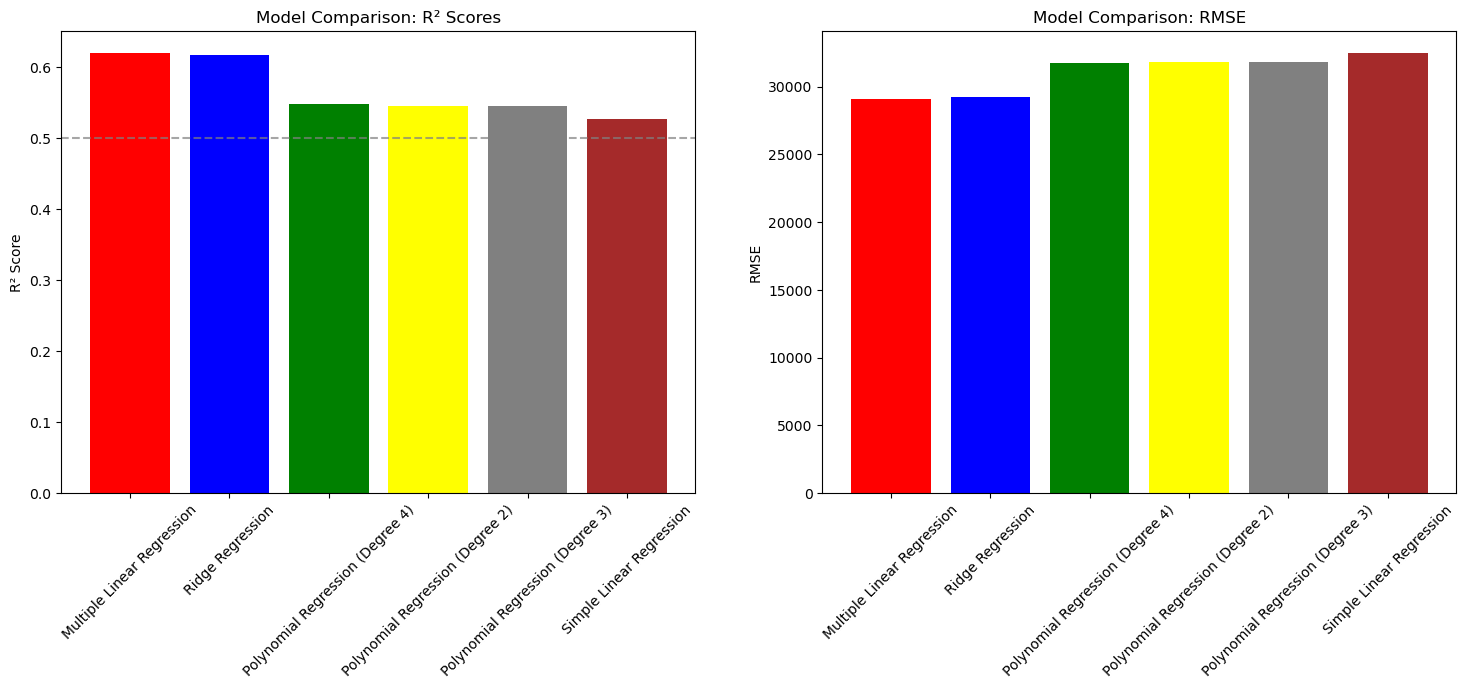

In [381]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

colors = ['red', 'blue', 'green', 'yellow', 'gray', 'brown']

ax1.bar(comparison_df['Model Name'], comparison_df['R² Score'], color=colors[:len(comparison_df)])
ax1.axhline(y=0.5, color='gray', linestyle='--', alpha=0.7)
ax1.set_title('Model Comparison: R² Scores')
ax1.set_ylabel('R² Score')
ax1.tick_params(axis='x', rotation=45)

ax2.bar(comparison_df['Model Name'], comparison_df['RMSE'], color=colors[:len(comparison_df)])
ax2.set_title('Model Comparison: RMSE')
ax2.set_ylabel('RMSE')
ax2.tick_params(axis='x', rotation=45)

plt.show()

## Task 9: Analysis and Conclusions

### Summary Questions

Answer the following questions based on your results:

1. **Best Simple Linear Regression Feature:**
   - Which single feature performed best?<br>
      R&D Spend.
   - What was its R² score?<br>
      0.5262
   - Why do you think this feature works well?<br>
      It has highest with Profit.

2. **Multiple vs Simple Linear Regression:**
   - Did using all features improve performance?<br>
      Yes.
   - By how much did R² improve?<br>
      0.0934
   - Are there diminishing returns?<br>


3. **Polynomial Regression Analysis:**
   - Which polynomial degree performed best?<br>
      Degree 4.
   - Did you observe overfitting in higher degrees?<br>
      Yes.
   - How did you determine the optimal degree?<br>
      Train models with different degrees and choose the best one.

4. **Ridge Regression Insights:**
   - Did Ridge improve over Multiple Linear Regression?<br>
      Yes.
   - What was the optimal alpha value?<br>
      0.01.
   - How did regularization affect the coefficients?<br>


5. **Overall Best Model:**
   - Which model would you recommend for deployment?<br>
      Multiple linear model.
   - Why? (Consider performance, complexity, and generalization)<br>
      It has best performance and doesn't need to compute too much.
   - What are its limitations?<br>
      It can just used in linear data. If data is not like linear, model may generate a terrible result.

6. **Residual Analysis:**
   - Which model had the most random residual plot?<br>

   - Did you identify any patterns suggesting model improvements?

7. **Feature Importance:**
   - Which features are most important for predicting profit?<br>
      R&D Spend.
   - Were there any surprising findings?
   - Should any features be removed?<br>
      No.

8. **Practical Implications:**
   - If you were advising a startup, what would you recommend?<br>
      First company should select data.
   - Should they focus on R&D, Marketing, or Administration spending?<br>
      R&D.
   - How confident are you in your model's predictions?<br>
      I don't think it's extremely accurate, but it's roughly accurate.

---

## Bonus Challenges (Optional)

### Challenge 1: Cross-Validation
Implement k-fold cross-validation to get more robust performance estimates.

### Challenge 2: Feature Engineering
Create interaction terms (e.g., R&D × Marketing) and test if they improve the model.

### Challenge 3: Outlier Analysis
Identify outliers and build models with/without them. How does it affect performance?

---



## Submission Checklist

Before submitting, ensure you have:
- [ ] Filled in your name and student ID
- [ ] Completed all EDA visualizations (6 required)
- [ ] Built all four model types:
  - [ ] Simple Linear Regression (2 features)
  - [ ] Multiple Linear Regression
  - [ ] Polynomial Regression (degrees 2, 3, 4)
  - [ ] Ridge Regression
- [ ] Created all required visualizations:
  - [ ] Regression line plots
  - [ ] Residual plots
  - [ ] Actual vs Predicted plots
  - [ ] Model comparison charts
- [ ] Calculated all performance metrics
- [ ] Answered all analysis questions
- [ ] Added markdown cells explaining your observations
- [ ] Run all cells and verified outputs
- [ ] Exported notebook to PDF/HTML

---

## Key Concepts to Remember

### Model Selection Criteria:
1. **R² Score**: Higher is better (closer to 1)
2. **RMSE**: Lower is better (smaller error)
3. **Residuals**: Should be randomly scattered
4. **Simplicity**: Simpler models often generalize better
5. **Domain Knowledge**: Model should make practical sense

### Common Pitfalls to Avoid:
- Not scaling features when necessary
- Using test data for training
- Overfitting with too complex models
- Ignoring residual patterns
- Not considering business context

**Good luck with your regression analysis!**